# Template Matching

## Descrição

Programar um método de Template Matching e para encontrar 2 pokemons em uma figura cheia de pokemons. Serão implementadas 2 diferentes métricas para comparar o template com partes da imagem.

## Leitura das Imagens

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
from PIL import Image, ImageOps
from skimage import color
from skimage import io
from scipy.linalg import sqrtm
from mpl_toolkits.mplot3d import axes3d

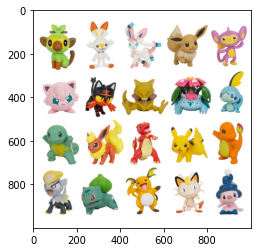

In [2]:
original_image_ = mpimg.imread('Pokemons.jpg')
plate1 = mpimg.imread('pikachu.jpg')
plate2 = mpimg.imread('bulba.jpg')

plt.imshow(original_image_)

Essa primeira figura corresponde a imagem onde buscamos encntrar as placas 1 e 2 mostradas abaixo.

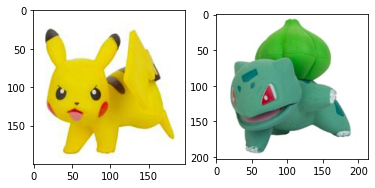

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(plate1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(plate2)

As dimensões de cada uma das imagens está mostrada abaixo:

In [4]:
print("Dimensão figura original: " + str(original_image_.shape))
print("Dimensão figura placa 1: " + str(plate1.shape))
print("Dimensão figura placa 2: " + str(plate2.shape))

Dimensão figura original: (1000, 1000, 3)
Dimensão figura placa 1: (200, 198, 3)
Dimensão figura placa 2: (204, 214, 4)


## Conversão das imagens para grayscale

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until


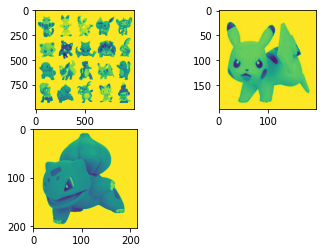

In [5]:
original_image = color.rgb2gray(original_image_)
plate1 = color.rgb2gray(plate1)
plate2 = color.rgb2gray(plate2)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(original_image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(plate1)
ax2 = fig.add_subplot(2,2,3)
ax2.imshow(plate2)


Como pode ser visto abaixo, agora temos não mais 3 matrizes de pixels (RGB) mas sim apenas uma matriz para cada uma das imagens. O objetivo disso é facilitar as operações realizadas a seguir.

In [6]:
print("Dimensão figura original: " + str(original_image.shape))
print("Dimensão figura placa 1: " + str(plate1.shape))
print("Dimensão figura placa 2: " + str(plate2.shape))

Dimensão figura original: (1000, 1000)
Dimensão figura placa 1: (200, 198)
Dimensão figura placa 2: (204, 214)


## Aplicando Template Matching para encontrar o pokemon 1 na imagem original

In [7]:
nl = original_image.shape[0] - plate1.shape[0]
nc = original_image.shape[1] - plate1.shape[1]
print(nl)
print(nc)

800
802


A distância de Minkowski é uma métrica em um espaço vetorial normado, a qual pode ser considerada como uma generalização de ambas as distâncias euclidiana e Manhattan, apresentadas abaixo.

![roc.svg](min.png)


- p=1 -> Distância Manhattan.
- p=2 -> Distância Euclidiana


### Distância Manhattan

In [8]:
m = np.zeros((nl, nc))
for line in range(0, nl):
    for column in range(0, nc):
        m[line, column] = np.sum(abs(original_image[line:line+plate1.shape[0], column:column+plate1.shape[1]] - plate1))

print(m.shape)

(800, 802)


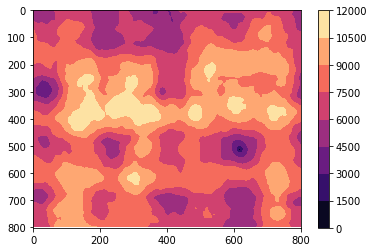

In [9]:
plt.contourf(m, cmap='magma')
plt.ylim([nc, 0])
plt.colorbar()

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


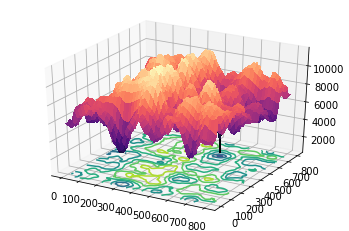

In [10]:
def plot_3d(nl, nc, d):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    Z=m
    X, Y = np.mgrid[0:nl, 0:nc]
    # 3D plots for each contour.
    surf1 = ax.plot_surface(X, Y, Z, cmap="magma", linewidth=0, antialiased=False)
    ax.contour(X, Y, Z, zdir='z', offset=-0.5)
    plt.show()

plot_3d(nl, nc, m)

In [11]:
idy,idx = np.where(m == m.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[618] , [512]


Na imagem acima pode-se perceber que existe um ponto de mínimo na coordenada (86, 264), é começando exatamente nesse ponto que supomos estar a placa procurada dentro da imagem original. Desenhando assim um retângulo centrado nesse ponto podemos obter o retultado abaixo.

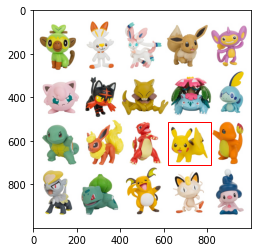

In [12]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),200,200, edgecolor='r', facecolor="none")

ax.imshow(original_image_)
ax.add_patch(rect)

### Distância Euclidiana

In [13]:
d = np.zeros((nl, nc))
for line in range(0, nl):
    for column in range(0, nc):
        d[line, column] = np.sum(abs(original_image[line:line+plate1.shape[0], column:column+plate1.shape[1]] - plate1)**2)**0.5

print(d.shape)

(800, 802)


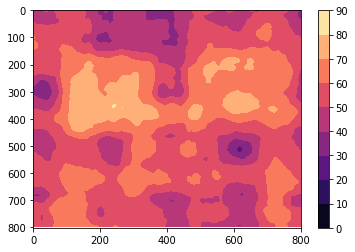

In [14]:
plt.contourf(d, cmap='magma')
plt.ylim([nc, 0])
plt.colorbar()

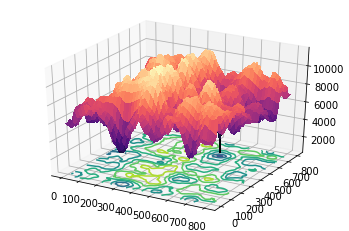

In [15]:
plot_3d(nl, nc, d)

In [16]:
idy,idx = np.where(d == d.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[618] , [512]


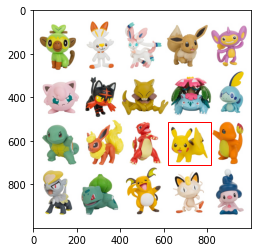

In [17]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),200,200, edgecolor='r', facecolor="none")

ax.imshow(original_image_)
ax.add_patch(rect)

## Aplicando Template Matching para encontra o pokemon 2 na imagem original


In [18]:
nl = original_image.shape[0] - plate2.shape[0]
nc = original_image.shape[1] - plate2.shape[1]
print(nl)
print(nc)

796
786


### Distância Manhattan

In [19]:
m = np.zeros((nl, nc))
for line in range(0, nl):
    for column in range(0, nc):
        m[line, column] = np.sum(abs(original_image[line:line+plate2.shape[0], column:column+plate2.shape[1]] - plate2))

print(m.shape)

(796, 786)


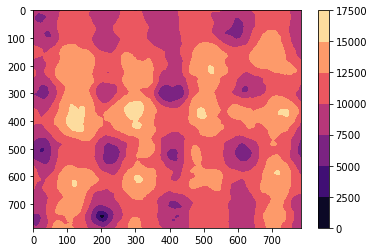

In [20]:
plt.contourf(m, cmap='magma')
plt.ylim([nc, 0])
plt.colorbar()

In [21]:
idy,idx = np.where(m == m.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[202] , [744]


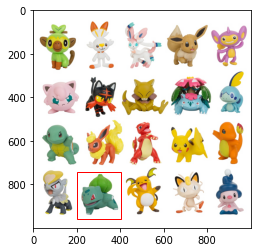

In [22]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),plate2.shape[0],plate2.shape[1], edgecolor='r', facecolor="none")

ax.imshow(original_image_)
ax.add_patch(rect)

### Distância Euclidiana

In [23]:
d = np.zeros((nl, nc))
for line in range(0, nl):
    for column in range(0, nc):
        d[line, column] = np.sum(abs(original_image[line:line+plate2.shape[0], column:column+plate2.shape[1]] - plate2)**2)**0.5

print(d.shape)

(796, 786)


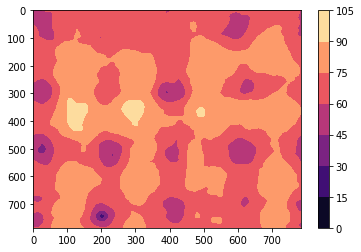

In [24]:
plt.contourf(d, cmap='magma')
plt.ylim([nc, 0])
plt.colorbar()

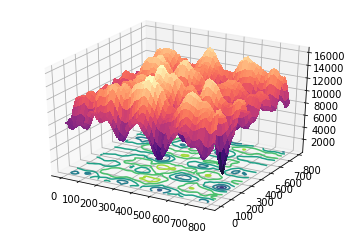

In [25]:
plot_3d(nl, nc, d)

In [26]:
idy,idx = np.where(d == d.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[202] , [744]


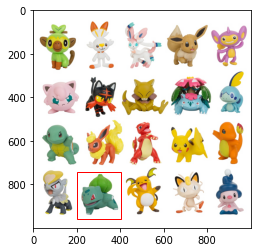

In [27]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),plate2.shape[0],plate2.shape[1], edgecolor='r', facecolor="none")

ax.imshow(original_image_)
ax.add_patch(rect)